# The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris Setosa?

per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([0])

# Implementing MLPs with Keras

## Installing TensorFlow

In [4]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.15.0'

# Building an Image Classifier Using the Sequential API

## Using Keras to Load the Dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [6]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

## Creating the Model Using the Sequential API

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.Dense(300, activation="relu"),
  keras.layers.Dense(100, activation="relu"),
  keras.layers.Dense(10, activation="softmax"),
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.layers

In [14]:
model.layers[1].name

'dense_3'

In [15]:
model.get_layer("dense_3").name

'dense_3'

In [16]:
hidden_1 = model.get_layer("dense_3")

In [17]:
weights, biases = hidden_1.get_weights()
weights

array([[-0.04347037,  0.04369339, -0.05062337, ...,  0.00174151,
        -0.06017842,  0.0154483 ],
       [-0.04809874,  0.0328946 , -0.03917323, ...,  0.03289831,
        -0.00487702, -0.01692691],
       [ 0.04751916, -0.05856695,  0.03843074, ...,  0.0269243 ,
         0.04294077,  0.05166145],
       ...,
       [-0.04977121, -0.03501365, -0.0033184 , ...,  0.06919682,
        -0.03637945, -0.06846647],
       [-0.0287904 ,  0.07107452,  0.06356926, ..., -0.02191538,
        -0.05648146,  0.0012982 ],
       [-0.01195579,  0.03608401, -0.06400925, ..., -0.00314577,
         0.02416273, -0.063251  ]], dtype=float32)

In [18]:
weights.shape

(784, 300)

In [19]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
biases.shape

(300,)

## Compiling the Model

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

## Training and Evaluating the Model

In [22]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.7213 - accuracy: 0.7650 - val_loss: 0.5216 - val_accuracy: 0.8152
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4901 - accuracy: 0.8293 - val_loss: 0.4666 - val_accuracy: 0.8350
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4468 - accuracy: 0.8424 - val_loss: 0.4334 - val_accuracy: 0.8542
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4196 - accuracy: 0.8521 - val_loss: 0.4179 - val_accuracy: 0.8518
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3993 - accuracy: 0.8596 - val_loss: 0.3976 - val_accuracy: 0.8574
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3842 - accuracy: 0.8655 - val_loss: 0.3997 - val_accuracy: 0.8620
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3709 - accuracy: 0.8696 - val_loss: 0.3646 - val_accuracy

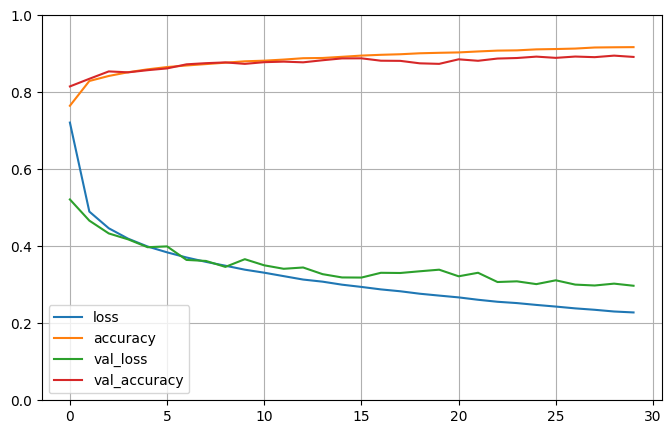

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [25]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.7833 - accuracy: 0.8488


[63.783294677734375, 0.848800003528595]

## Using the Model to Make Predictions

In [26]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 1s 735ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [28]:
y_pred = np.argmax(y_proba, axis=1)
y_pred

array([9, 2, 1])

In [29]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [30]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Building a Regression MLP Using the Sequential API

In [34]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [39]:
housing = fetch_california_housing()


X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

HTTPError: HTTP Error 403: Forbidden

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

# Building Complex Models Using the Functional API

In [43]:
input = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input], outputs=[output])

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden_1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss="mse", optimizer="sgd")

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

# Building Dynamic Models Using the Subclassing API

In [ ]:
class WideAndDeepModel(keras.models.Model):
  def __init__(self, units=30, activation="relu", **kwargs):
    super().__init__(**kwargs) # handles standard args (e.g., name)
    self.hidden1 = keras.layers.Dense(units, activation=activation)
    self.hidden2 = keras.layers.Dense(units, activation=activation)
    self.main_output = keras.layers.Dense(1)
    self.aux_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_A, input_B = inputs
    hidden1 = self.hidden1(input_B)
    hidden2 = self.hidden2(hidden1)
    concat = keras.layers.concatenate([input_A, hidden2])
    main_output = self.main_output(concat)
    aux_output = self.aux_output(hidden2)
    return main_output, aux_output

model = WideAndDeepModel()

# Saving and Restoring a Model

In [ ]:
model.save("my_keras_model.h5")
# model = keras.models.load_model("my_keras_model.h5")

# Using Callbacks

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data = (X_valid, y_valid),
                    callbacks = [checkpoint_cb, early_stopping_cb])

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
  def on_epoch_end(Self, epoch, logs):
    print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

# Visualization Using TensorBoard

In [ ]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
  import time
  run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
  return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train,
                    epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

# Fine-Tuning Neural Network Hyperparameters

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
  model = keras.models.Sequential()
  options={"input_shape": input_shape}
  for layer in range(n_hidden):
    model.add(keras.layers.Dense(n_neurons, activation="relu", **options))
    options={}

  model.add(keras.layers.Dense(1, **options))
  optimizer = keras.optimizers.SGD(learning_rate)
  model.compile(loss="mse", optimizer=optimizer)
  return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
rnd_search_cv.best_params_

In [ ]:
rnd_search_cv.best_score_